# Supervised Learning

## Classification

### Preparation

Untuk persiapan, kita akan memanggil seluruh library yang akan kita pakai pada project kali ini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
train = pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
d = train.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-5-7bc755489b8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

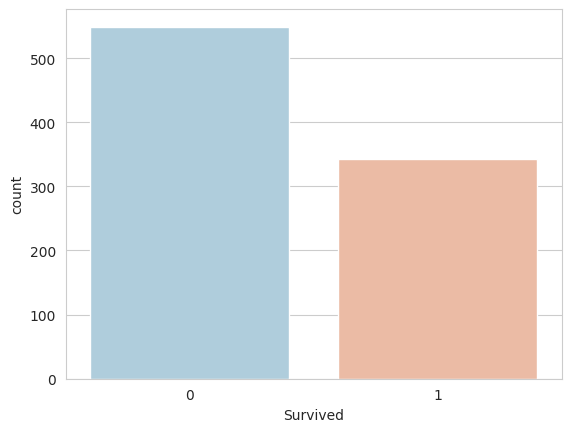

In [ ]:
# Cek relative size dari survived dan not survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

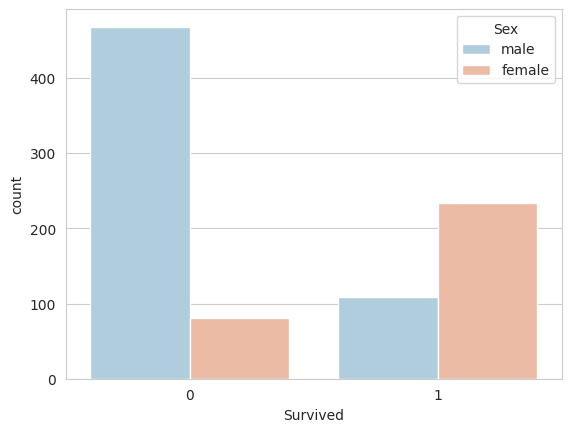

In [ ]:
# Survivablity vs sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

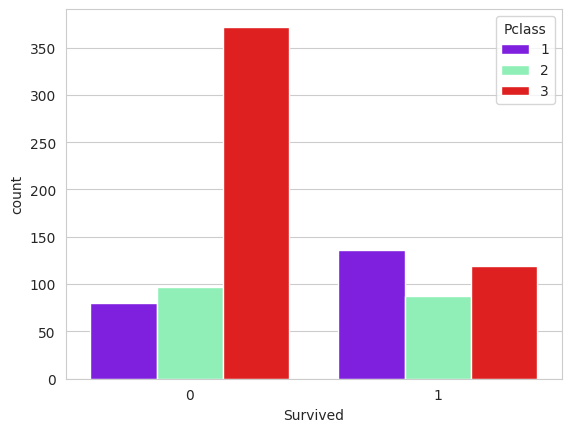

In [ ]:
# Survivablity vs passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Text(0.5, 1.0, 'Persentase penumpang yang selamat berdasarkan kelas')

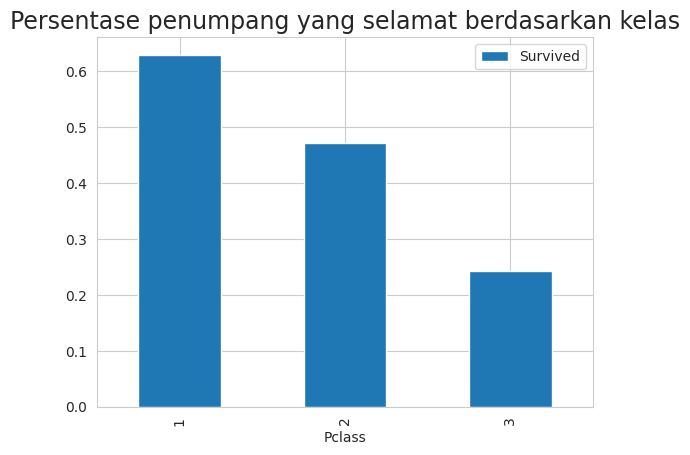

In [ ]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Persentase penumpang yang selamat berdasarkan kelas",fontsize=17)

<Axes: xlabel='Survived', ylabel='count'>

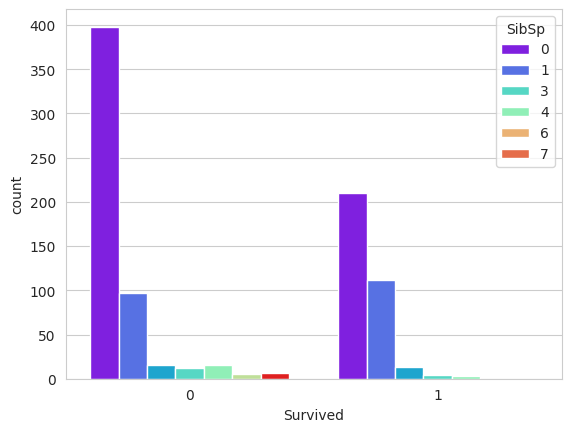

In [ ]:
# Survived vs Sibling and Spouses
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')

<Axes: title={'center': 'Histogram usia penumpang'}, xlabel='Usia penumpang', ylabel='Count'>

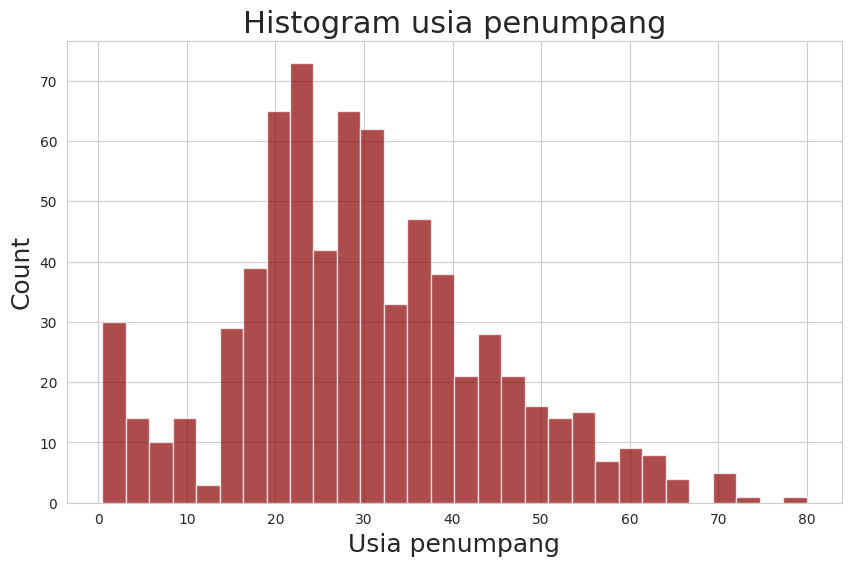

In [ ]:
# Cek distribusi dari umur
plt.xlabel("Usia penumpang",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Histogram usia penumpang",fontsize=22)
train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

<ipython-input-11-1bb3acdf5dc3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Passenger Class', ylabel='Age'>

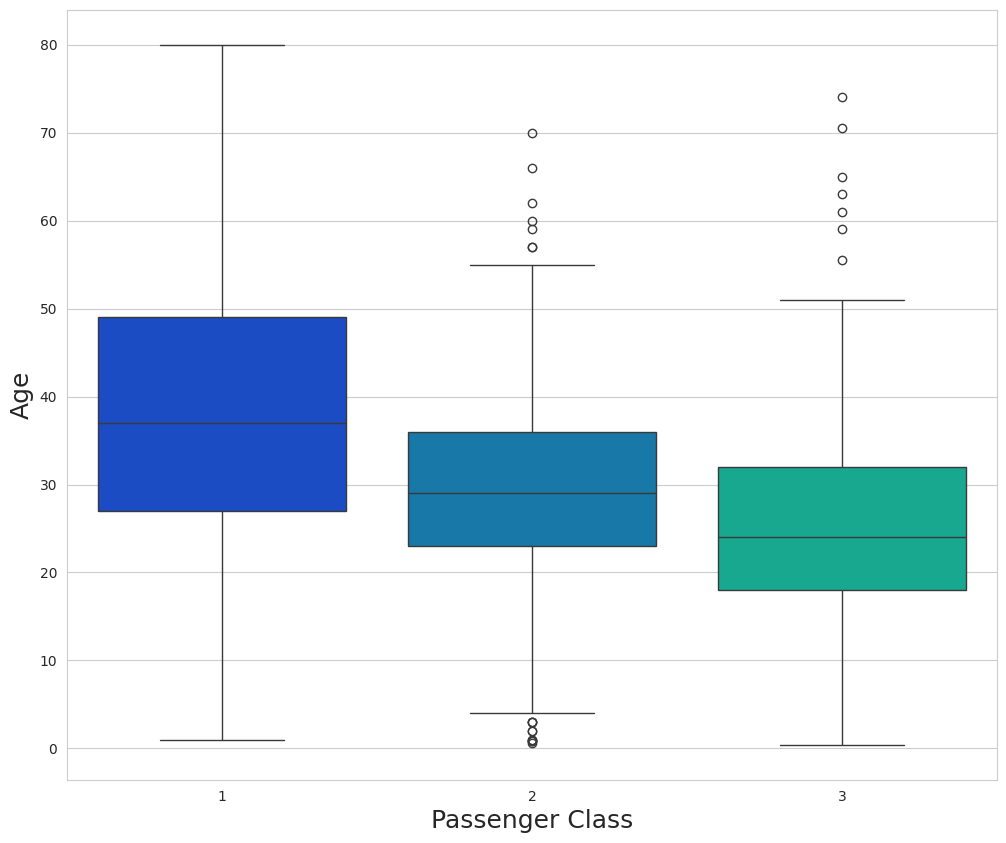

In [ ]:
# Distribusi umur di setiap kelas
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Text(0.5, 0, 'Passenger class')

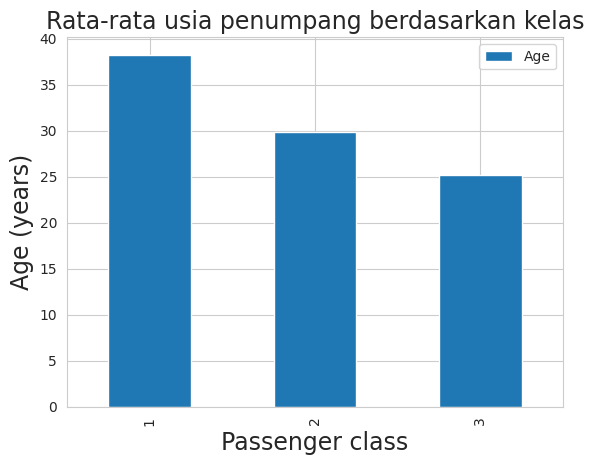

In [ ]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Rata-rata usia penumpang berdasarkan kelas",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

### Fitur Engineering

In [ ]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-13-7d5da24aec80>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-13-7d5da24aec80>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Text(0.5, 1.0, 'Bar plot jumlah fitur numerik')

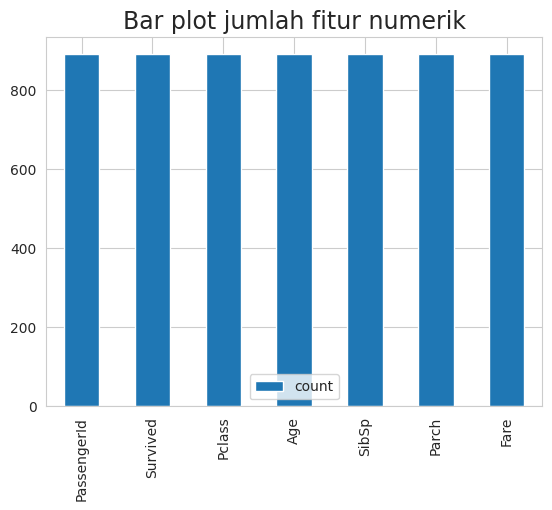

In [ ]:
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot jumlah fitur numerik",fontsize=17)

In [ ]:
# drop cabin karena memiliki banyak null value (>50%)
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Drop semua kolom yang tidak penting
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=42)

In [ ]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (622, 7)
Test shape: (267, 7)


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()

clf1.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf1.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred) #akurasi model
print(f'Akurasi Model KNN: {accuracy:.2f}')

print("Confusion Matrix:") #confusion matrix nya
print(confusion_matrix(y_test, y_pred))

print("Classification Report:") #laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi Model KNN: 0.71
Confusion Matrix:
[[136  31]
 [ 47  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       167
           1       0.63      0.53      0.58       100

    accuracy                           0.71       267
   macro avg       0.69      0.67      0.68       267
weighted avg       0.70      0.71      0.70       267



# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi data uji
y_pred_nb = nb.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Akurasi Model Decision Tree: {accuracy:.2f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Akurasi Model Decision Tree: 0.78
Confusion Matrix:
[[135  32]
 [ 26  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       167
           1       0.70      0.74      0.72       100

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.78      0.78       267



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Prediksi data uji
y_pred_dt = dt.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Akurasi Model Decision Tree: {accuracy:.2f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Akurasi Model Decision Tree: 0.76
Confusion Matrix:
[[133  34]
 [ 31  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       167
           1       0.67      0.69      0.68       100

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



Krena yang lebih bagus adalah nilai evaluasinya model Naive Bayes, maka kita akan tes menggunakan data baru(Naive Bayes)

In [38]:
# Data penumpang baru
# Format: [Pclass, Sex (0=female, 1=male), Age, SibSp, Parch, Fare, Embarked (0=C, 1=Q, 2=S)]
new_data = np.array([[3, 0, 25.0, 0, 0, 7.25, 2]])

# Prediksi kelas
new_prediction = nb.predict(new_data)
print("Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat):", new_prediction[0])

# Prediksi probabilitas
proba = nb.predict_proba(new_data)
print("Probabilitas Prediksi [Tidak Selamat, Selamat]:", proba[0])

Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat): 1
Probabilitas Prediksi [Tidak Selamat, Selamat]: [0.3268794 0.6731206]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#---------------------------------------------------------------------------------------------------------------------------------(KNN)


In [41]:
# Data penumpang baru
# Format: [Pclass, Sex (0=female, 1=male), Age, SibSp, Parch, Fare, Embarked (0=C, 1=Q, 2=S)]
new_data = np.array([[3, 0, 25.0, 0, 0, 7.25, 2]])

# Prediksi kelas
new_prediction = clf1.predict(new_data)
print("Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat):", new_prediction[0])

# Prediksi probabilitas
proba = clf1.predict_proba(new_data)
print("Probabilitas Prediksi [Tidak Selamat, Selamat]:", proba[0])

Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat): 0
Probabilitas Prediksi [Tidak Selamat, Selamat]: [1. 0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#---------------------------------------------------------------------------------------------------------------------------------Decision Tree

In [42]:
# Data penumpang baru
# Format: [Pclass, Sex (0=female, 1=male), Age, SibSp, Parch, Fare, Embarked (0=C, 1=Q, 2=S)]
new_data = np.array([[3, 0, 25.0, 0, 0, 7.25, 2]])

# Prediksi kelas
new_prediction = dt.predict(new_data)
print("Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat):", new_prediction[0])

# Prediksi probabilitas
proba = dt.predict_proba(new_data)
print("Probabilitas Prediksi [Tidak Selamat, Selamat]:", proba[0])

Prediksi Kelangsungan Hidup (0 = Tidak Selamat, 1 = Selamat): 0
Probabilitas Prediksi [Tidak Selamat, Selamat]: [1. 0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#---------------------------------------------------------------------------------------------------------------------------------

# **Contoh Penggunaan Parameter**

### jika kita mau mengubah parameter apa saja yang akan kita gunakan maka bisa dilakukan seperti ini

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
clf2.fit(X_train, y_train)

y_pred_knn = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_knn) #akurasi model
print(f'Akurasi Model KNN: {accuracy:.2f}')

print("Confusion Matrix:") #confusion matrix nya
print(confusion_matrix(y_test, y_pred_knn))

print("Classification Report:") #laporan klasifikasi
print(classification_report(y_test, y_pred_knn))

Akurasi Model KNN: 0.71
Confusion Matrix:
[[136  31]
 [ 46  54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       167
           1       0.64      0.54      0.58       100

    accuracy                           0.71       267
   macro avg       0.69      0.68      0.68       267
weighted avg       0.71      0.71      0.71       267



### jika ingin mencoba semua parameter kita bisa menggunakan GridSearchCV

### Contoh penggunaan Model KNN dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# 1. Definisikan metrik-metrik scoring yang ingin digunakan
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 2. Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 3. Buat model KNN
knn = KNeighborsClassifier()

# 4. GridSearch dengan semua metrik, pilih 'f1' sebagai metrik utama (refit)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scoring, refit='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 5. Hasil Cross-Validation (Training)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_metrics = cv_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
print("\n=== Hasil Evaluasi Training (Cross-Validation) ===")
print(cv_metrics.sort_values(by='mean_test_f1', ascending=False))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Hasil Evaluasi Training (Cross-Validation) ===
                                               params  mean_test_accuracy  \
7   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...            0.730026   
11  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...            0.731548   
9   {'metric': 'manhattan', 'n_neighbors': 5, 'wei...            0.720310   
6   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...            0.717110   
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...            0.713884   
5   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...            0.713845   
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...            0.709006   
8   {'metric': 'manhattan', 'n_neighbors': 5, 'wei...            0.710632   
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...            0.704219   
10  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...            0.705819   
2   {'metric': 'euclidean', 'n_neighbors

In [ ]:
# Simpan hasil evaluasi ke file Excel
cv_metrics_sorted = cv_metrics.sort_values(by='mean_test_f1', ascending=False)
cv_metrics_sorted.to_excel("hasil_gridsearch_knn.xlsx", index=False)

print("Hasil telah disimpan ke 'hasil_gridsearch_knn.xlsx'")


Hasil telah disimpan ke 'hasil_gridsearch_knn.xlsx'


In [ ]:
best_model = grid_search.best_estimator_
print("\n=== Parameter Terbaik ===")
print(grid_search.best_params_)


=== Parameter Terbaik ===
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_pred = best_model.predict(X_test)
print("\n=== Evaluasi di Test Set ===")
print(f"Akurasi:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Presisi:  {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall:   {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Evaluasi di Test Set ===
Akurasi:  0.72
Presisi:  0.70
Recall:   0.69
F1-Score: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       167
           1       0.65      0.55      0.60       100

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.72      0.72      0.72       267

Confusion Matrix:
[[138  29]
 [ 45  55]]


In [ ]:
import numpy as np

# Data penumpang baru (dalam urutan sama seperti fitur model)
new_data_1 = np.array([[3, 0, 25.0, 0, 0, 7.25, 2]])

# Prediksi apakah penumpang ini selamat atau tidak
prediction = best_model.predict(new_data_1)

print("Prediksi (0 = Tidak Selamat, 1 = Selamat):", prediction[0])

Prediksi (0 = Tidak Selamat, 1 = Selamat): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
